# Классификация текстов

### Data Mining vs Text Mining

Data Mining:   
* извлечение *неочевидной* информации

Text Mining:  
* извлечение *очевидной* информации

Трудности  
* Огромные объемы
* Отстутсвие структуры
	    

## Задачи Text Mining
* Суммаризация текста  
агрегация новостей
* Классификация и кластеризация документов  
категоризация, антиспам, sentiment analysis, opinion mining
* Извлечение метаданных  
определение языка, автора, тегирование
* Выделение сущностей  
места, люди, компании, почтовые адреса


* автоматический перевод
* чат-бот
* поиск точных ответов на вопросы в тексте

## Этапы (простой) обработки текста

<img src="images/textm.png">


## Декодирование


**Def.**  
перевод последовательности байт в последовательность символов

* Распаковка  
*plain/.zip/.gz/...*
* Кодировка  
*ASCII/utf-8/Windows-1251/...*
* Формат  
*csv/xml/json/doc...*

Кроме того: что такое документ?



## Разбиение на токены
**Def.**  
разбиение последовательности символов на части (токены), возможно, исключая из рассмотрения некоторые символы  
Наивный подход: разделить строку пробелами и выкинуть знаки препинания  


*Трисия любила Нью-Йорк, поскольку любовь к Нью-Йорку могла положительно повлиять на ее карьеру.*  


**Проблемы:**  
* example@example.com, 127.0.0.1
* С++, C#
* York University vs New York University
* Зависимость от языка (“Lebensversicherungsgesellschaftsangestellter”, “l’amour”)
Альтернатива: n-граммы

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/rokku/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from nltk.tokenize import RegexpTokenizer


s = "Трисия любила Нью-Йорк, поскольку любовь к Нью-Йорку могла положительно повлиять на ее карьеру."

tokenizer = RegexpTokenizer("\w+|[^\w\s]+")
for t in tokenizer.tokenize(s): 
    print(t)

Трисия
любила
Нью
-
Йорк
,
поскольку
любовь
к
Нью
-
Йорку
могла
положительно
повлиять
на
ее
карьеру
.


## Стоп-слова
**Def.**  
Наиболее частые слова в языке, не содержащие никакой информации о содержании текста



In [3]:
from nltk.corpus import stopwords


print(" ".join(stopwords.words("russian")[1:20]))

в во не что он на я с со как а то все она так его но да ты


Проблема: “To be or not to be"

## Нормализация
**Def.**  
Приведение токенов к единому виду для того, чтобы избавиться от поверхностной разницы в написании  

Подходы  
* сформулировать набор правил, по которым преобразуется токен  
Нью-Йорк → нью-йорк → ньюйорк → ньюиорк
* явно хранить связи между токенами (WordNet – Princeton)  
машина → автомобиль, Windows 6→ window

In [4]:
s = "Нью-Йорк"
s1 = s.lower()
print(s1)

нью-йорк


In [5]:
import re
s2 = re.sub(r"\W", "", s1, flags=re.U)
print(s2)

ньюйорк


In [6]:
s3 = re.sub(r"й", u"и", s2, flags=re.U)
print(s3)

ньюиорк


## Стемминг и Лемматизация
**Def.**  
Приведение грамматических форм слова и однокоренных слов к единой основе (lemma):
* Stemming – с помощью простых эвристических правил
  * Porter (Cambridge – 1980)
        5 этапов, на каждом применяется набор правил, таких как
            sses → ss (caresses → caress)
            ies → i (ponies → poni)

  * Lovins (1968)
  * Paice (1990)
  * другие
* Lemmatization – с использованием словарей и морфологического анализа


## Стемминг

In [7]:
from nltk.stem.snowball import PorterStemmer
from nltk.stem.snowball import RussianStemmer


s = PorterStemmer()
print(s.stem("Tokenization"))
print(s.stem("stemming"))

r = RussianStemmer()
print(r.stem("Авиация"))
print(r.stem("национальный"))

token
stem
авиац
национальн


**Наблюдение**  
для сложных языков лучше подходит лемматизация

## Лемматизация

In [9]:
!pip install pymorphy2

/bin/sh: 1: pip: not found


In [11]:
import pymorphy2


morph = pymorphy2.MorphAnalyzer()
print(morph.parse("думающему")[0].normal_form)

думать


## Heaps' law
Эмпирическая закономерность в лингвистике, описывающая распределение числа уникальных слов в документе (или наборе документов) как функцию от его длины.

$$
M = k T^\beta, \;M \text{ -- размер словаря}, \; T \text{ -- количество слов в корпусе}
$$
$$
30 \leq k \leq 100, \; b \approx 0.5
$$

<img src="images/dim.png">
<img src="images/heaps.png">

## Представление документов
**Boolean Model.** Присутствие или отсутствие слова в документе  
**Bag of Words.** Порядок токенов не важен  

*Погода была ужасная, принцесса была прекрасная.
Или все было наоборот?*

Координаты
* Мультиномиальные: количество токенов в документе
* Числовые: взвешенное количество токенов в документе

## Zipf's law
Эмпирическая закономерность распределения частоты слов естественного языка

$t_1, \ldots, t_N$ - токены, отранжированные по убыванию частоты
   	
$f_1, \dots, f_N$ - соответствующие частоты

**Закон Ципфа**
	$$
	f_i = \frac{c}{i^k}
	$$	
	
	Что еще? Посещаемость сайтов, количество друзей, население городов...
<img src="images/zipf.png">


## TF-IDF

Количество вхождений слова $t$ в документе $d$
$$
TF_{t,d} = term\!\!-\!\!frequency(t, d)
$$
Количество документов из $N$ возможных, где встречается $t$
$$
DF_t = document\!\!-\!\!fequency(t)
$$
$$
IDF_t = inverse\!\!-\!\!document\!\!-\!\!frequency(t) = \log \frac{N}{DF_t}
$$
TF-IDF
$$
TF\!\!-\!\!IDF_{t,d} = TF_{t,d} \times IDF_t
$$

Оценивает важность слова в контексте документа, являющегося частью корпуса


## BM25
Функция ранжирования, используемая поисковыми системами для упорядочивания документов по их релевантности данному поисковому запросу. BM25 и его различные более поздние модификации (например, BM25F) представляют собой современные TF-IDF-подобные функции ранжирования, широко используемые на практике в поисковых системах  

$$
score(D, Q) = \sum_{i=1}^{n} IDF(q_i) * \frac{TF(q_i, D) * (k_1 + 1)}{TF(q_i, D) + k_1 * (1 - b + b * \frac{|D|}{avgdl})}
$$
где:  
* $Q$ -- запрос, содержащий слова $q_1, q_2, ..., q_n$;
* $D$ -- документ, $|D|$ -- длина документа;
* $avgdl$ -- средняя длина документа в коллекции;
* $k_1$ и $b$ -- свободные коэффициенты, обычно их выбирают как $k_1=2.0$ и $b=0.75$;

$IDF$ чаще всего сглаженный:
$$
IDF(q_i) = \log{\frac{N - n(q_i) + 0.5}{n(q_i) + 0.5}}
$$

Заметим, что вышеуказанная формула $IDF$ имеет следующий недостаток. Для слов, входящих в более чем половину документов из коллекции, значение IDF отрицательно. Таким образом, при наличии любых двух почти идентичных документов, в одном из которых есть слово, а в другом — нет, второй может получить бо́льшую оценку.  
Иными словами, часто встречающиеся слова испортят окончательную оценку документа. Это нежелательно, поэтому во многих приложениях вышеприведённая формула может быть скорректирована следующими способами:
* Игнорировать вообще все отрицательные слагаемые в сумме (что эквивалентно занесению в стоп-лист и игнорированию всех соответствующих высокочастотных слов);
* Налагать на IDF некоторую нижнюю границу $\varepsilon$ : $IDF(q_i) = \min(IDF(q_i), \varepsilon)$;
* Использовать другую формулу $IDF$, не принимающую отрицательных значений.

## Практический кейс
### Автоматическое определение текста языка

In [12]:
import warnings
warnings.filterwarnings("ignore")

import argparse
import codecs
import unicodedata
import operator

import nltk
import numpy as np

try:
    from sklearn.model_selection import cross_val_score, train_test_split
except:
    from sklearn.cross_validation import cross_val_score, train_test_split

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

%matplotlib inline

Будем решать задачу определения языка печатного текста. В файле `europarl.test.txt` содержатся записи депатов в Европарламенте. Каждая строка содержит код языка и высказывание на этом языке, например, на болгарском:

`bg	(DE) Г-н председател, след повече от 300 години колониално управление и след като континентът се превърна в арена на Студената война, днес Латинска Америка вече е един от нововъзникващите региони в света.`

Код языка будет целевой переменной, а из высказывания нам предстоит извлечь признаки.

Один из возможных подходов состоит в том, чтобы в качестве признаков использовать тройки из подряд идущих символов, встречающихся в словах. Предположение состоит в том, что для каждого языка список наиболее популярных троек более-менее уникален. Попробуем проверить это предположение.

## Считывание данных

In [38]:
DS_PATH = "./europarl.test.txt" # Path to the data file
N_GRAM = 3 # Extract symbol sequences of length N
TOP_TOKENS = 50 # Number of top selected n-grams for each language

In [39]:
def read_documents(data_path):
    """
    Reads a sequence of documents from the text file
    located on a given path.

    Returns:
        A generator of tuples (LANG_CODE, unicode)
    """
    with codecs.open(data_path, "rU") as data_file:
        for line in data_file:
            lang, doc = line.strip().split("\t")
            yield lang, doc

In [40]:
def normalise_document(doc):
    """
    Convert document to lower-case and remove accents
    
    Returns:
        A normalised document as unicode
    """
    return "".join(c for c in unicodedata.normalize("NFD", doc.lower()) if not unicodedata.combining(c))

In [41]:
def tokenize_document(doc, n):
    """
    Split document in N-Grams

    Returns:
        Iterable (generator or list) of unicode n-grams
    """
    tokenizer = nltk.WordPunctTokenizer()
    for token in tokenizer.tokenize(doc):
        if len(token) >= n:
            for ngram in nltk.ngrams(token, n):
                yield "".join(ngram)

Первым делом нам необходимо зачитать данные из файла. Будем читать 3 структуры данных:

- docs - список словарей, каждый из которых соответствует одному документу и содержит количество вхождений для каждой n-граммы (токена)
- langs - список, содержащий классы документов (каждому коду языка соответствует числовой класс)
- lang_freq - словарь, который нужен для подсчета ниболее популярных n-грам для каждого языка. Элементы этого словаря: код языка -> (id класса, частоты n-грам (аналогично docs)) 

Для того, чтобы заработал код, зачитывающий данные, необходимо (до) реализовать функции, перечисленные выше.

In [42]:
# A list of dicts, each representing one document in format:
# {token: count1, ...}
docs = []
# Language code for each dict (0-based)
langs = []
# A list of tuples, each tuple corresponds to one language
# First compunent is the code of the language, second is its token frequencies
# Contains entries like {lang_code: (lang_id, {token_frequencies})}
lang_freq = {}

for lang, doc in read_documents(DS_PATH):
    normalized_doc = normalise_document(doc)

    token_freq = {}
    for token in tokenize_document(normalized_doc, N_GRAM):
        token_freq[token] = 1 + token_freq.get(token, 0)
        if lang not in lang_freq:
            lang_freq[lang] = (len(lang_freq), {})
        lang_freq[lang][1][token] = 1 + lang_freq[lang][1].get(token, 0)

    docs.append(token_freq)
    langs.append(lang_freq[lang][0])

In [43]:
sorted(lang_freq['bg'], key=lang_freq.get, reverse=True)[:10]

TypeError: unhashable type: 'dict'

## Отбор признаков

Здесь предстоит выбрать топовые n-граммы для каждого языка (`select_features`) и отфильтровать документы так, чтобы в них остались только отобранные (`keep_only_features`)

In [48]:
def select_features(lang_freq, top_tokens):
    """
    From each language selects top_tokens to be used as features
    
    TODO: Implement this

    Returns:
        set(unicode tokens)
    """
    features = set()
    for lang, (lid, token_freq) in lang_freq.items():
        sorted_dict = sorted(token_freq.items(), key=lambda x: x[1])
        features.update(
            map(lambda x: x[0], sorted_dict[:top_tokens])
        )
    return features

In [49]:
def keep_only_features(docs, features):
    """
    Removes non-feature tokens from the document representations
    """
    for token_freq in docs:
        for token in list(token_freq.keys()):
            if token not in features:
                del token_freq[token]

In [50]:
# Select top n features for each lang
features = select_features(lang_freq, TOP_TOKENS)
# Remove from documents all features except the selected
keep_only_features(docs, features)

# Transform documents to numpy matrix
dv = DictVectorizer()
x = dv.fit_transform(docs).todense()
y = np.array(langs)
print("Data set shape x=({} x {}) y={}".format(x.shape[0], x.shape[1], len(y)))

Data set shape x=(21000 x 964) y=21000


## Создание и настройка модели

В этом пункте требуется реализовать модель (NB) и оценить метрику `accuracy` на кросс-валидации.

In [51]:
def create_model():
    """
    Initialise an NB model, supported by Sklearn

    Returns:
        Sklearn model instance
    """
    return LogisticRegression(n_jobs=-1)

In [52]:
def validate_model(model, x, y, folds=10):
    """
    Computes cross-validation score for the given data set and model.
    
    TODO: Implement this

    Returns:
        A numpy.array of accuracy scores.
    """
    
    return cross_val_score(model, x, y, cv=folds)

In [53]:
def plot_roc(model, x, y, class_ind=0):    
    # Compute ROC curve
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)
    fit = model.fit(x_train, y_train)
    y_prob = fit.predict_proba(x_test)   
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, class_ind], pos_label=class_ind)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.fill_between(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.3)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for class index %s' % class_ind)


_Замечание_ : обратите внимание, что тут нужно реализовать перебор параметров.

Model mean accuracy: 0.7658571428571428


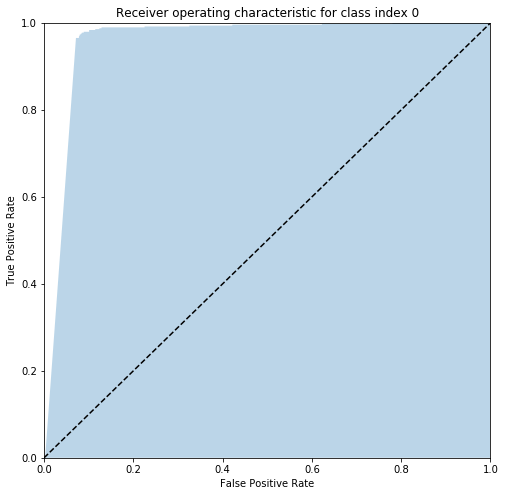

In [54]:
# TODO: Implement parameter grid search here
model = create_model()
# Print cross-validated accuracy
scores = validate_model(model, x, y)
print("Model mean accuracy: {}".format(np.mean(scores)))

# Plot ROC
plt.figure(figsize=(8, 8))
plot_roc(model, x, y, 0)
plt.show()